# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить любое из двух заданий

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров).Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip

--2021-11-20 06:12:17--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/33l8lp62rmvtx40/dataset.zip [following]
--2021-11-20 06:12:17--  https://www.dropbox.com/s/raw/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf9bd475abc0f4ed63e4d86ed81.dl.dropboxusercontent.com/cd/0/inline/BaXBsbaJPxqpp2haN2N8w1C_je1ifRy2QruptuC7F_nxfFUJMcZhdTP8s90iAdAWAoqnv5uR3HC8WjZhcIXa1umj6JoWnkIZwl2DbNWWdTjb7YhHfEgnqFd0SxlVDTGDh4Vy9vtCx35PcmFbEHcpxeJx/file# [following]
--2021-11-20 06:12:17--  https://ucf9bd475abc0f4ed63e4d86ed81.dl.dropboxusercontent.com/cd/0/inline/BaXBsbaJPxqpp2haN2N8w1C_je1ifRy2QruptuC7F_nxfFUJMcZhdTP8s90iAdAWAoqnv5uR3HC8WjZhcIXa1umj6JoWn

In [2]:
!unzip dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: dataset/dataset/val/class_101/00048.jpg  
  inflating: dataset/dataset/val/class_101/00049.jpg  
   creating: dataset/dataset/val/class_102/
  inflating: dataset/dataset/val/class_102/00000.jpg  
  inflating: dataset/dataset/val/class_102/00001.jpg  
  inflating: dataset/dataset/val/class_102/00002.jpg  
  inflating: dataset/dataset/val/class_102/00003.jpg  
  inflating: dataset/dataset/val/class_102/00004.jpg  
  inflating: dataset/dataset/val/class_102/00005.jpg  
  inflating: dataset/dataset/val/class_102/00006.jpg  
  inflating: dataset/dataset/val/class_102/00007.jpg  
  inflating: dataset/dataset/val/class_102/00008.jpg  
  inflating: dataset/dataset/val/class_102/00009.jpg  
  inflating: dataset/dataset/val/class_102/00010.jpg  
  inflating: dataset/dataset/val/class_102/00011.jpg  
  inflating: dataset/dataset/val/class_102/00012.jpg  
  inflating: dataset/dataset/val/class_102/00013.jpg  
  inflat

In [3]:
from PIL import Image
import numpy as np
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
import tqdm
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# You may add any imports you need

### Подготовка данных

In [4]:
import random


def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8 \
https://albumentations.ai/docs/examples/pytorch_classification/

#Задание 1

In [5]:
from torchvision import transforms

set_random_seed(123)

train_transform_1 = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225])
         ])

train_transform_2 = transforms.Compose(
        [
         transforms.RandomHorizontalFlip(),
         transforms.RandomResizedCrop(64),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225])
         ])


val_transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ])

# YOU CAN DEFINE AUGMENTATIONS HERE
concat_train = []
concat_train.append(ImageFolder('dataset/dataset/train', transform = train_transform_1))
concat_train.append(ImageFolder('dataset/dataset/train', transform = train_transform_2))


train_dataset = torch.utils.data.ConcatDataset(concat_train)

val_dataset = ImageFolder('dataset/dataset/val', transform = val_transform)

# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset


In [6]:
train_dataloader = DataLoader(train_dataset, batch_size = 512, shuffle=True) # TRAIN DATALOADER WHICH YOU CONSTRUCT
val_dataloader = DataLoader(val_dataset, batch_size = 512) # VAL DATALOADER WHICH YOU CONSTRUCT

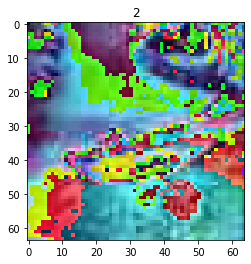

In [7]:
to_img = transforms.ToPILImage() 

im_data = ImageFolder('dataset/dataset/train', transform = train_transform_1)
plt.imshow(to_img(im_data[1000][0]))
plt.title(train_dataset[1000][1])
plt.show()

In [8]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [19]:
from tqdm import notebook
from tqdm.auto import tqdm
import sys


def train_one_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    # YOUR CODE (семинар 5)
    total_loss = 0
    num_batches = 0
    all_losses = []
    total_predictions = np.array([])
    total_labels = np.array([])

    # TRAIN YOUR MODEL HERE
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for images, labels in data_loader:

            # Move Batch to GPU
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)

            # Update weights
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Update descirption for tqdm
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
            all_losses.append(loss.detach().item())

            

    metrics = {"loss": total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean() * 100})

    print(f'train avg loss {np.array(all_losses).mean()}')
    return np.array(all_losses)


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs=10, scheduler=None):
    model.to(device)
    all_train_losses = []

    for epoch in range(n_epochs):
        # Train step
        print(f"Train Epoch: {epoch}")
        one_epoch_train_losses = train_one_epoch(model, train_dataloader, criterion, optimizer, device)
        all_train_losses.append(sum(one_epoch_train_losses) / len(one_epoch_train_losses))
        if scheduler != None:
          scheduler.step(one_epoch_train_losses.mean())

        # Eval step
        print(f"Validation Epoch: {epoch}")
        with torch.no_grad():
          predicts, true_classes = predict(model, val_dataloader, criterion, device)
          print(f"Val accuracy: {(np.array(predicts) == np.array(true_classes)).mean() * 100}")

    
    plt.plot(all_train_losses)
    plt.ylabel('Average CrossEntropy')
    plt.xlabel('epoch number')
    plt.show()


def predict(model, val_dataloder, criterion, device):
    model.eval()
    # YOUR CODE
    with torch.no_grad():
      predicts = []
      true_classes = []
      for x_test, y_test in notebook.tqdm(val_dataloder):
        x_test = x_test.to(device)
        y_pred = model(x_test)
        y_pred = y_pred.clone().detach().cpu()
        predicts.append(y_pred.argmax(1))
        y_test = y_test.clone().detach().cpu()
        true_classes.append(y_test)
      
      predicts = torch.cat(predicts)
      true_classes = torch.cat(true_classes)
      
    # PREDICT FOR EVERY ELEMENT OF THE VAL DATALOADER AND RETURN CORRESPONDING LISTS
    return predicts, true_classes

In [20]:
from torchvision.models import resnet18
from torch.nn import CrossEntropyLoss


model = resnet18(pretrained=False)
model.fc = nn.Linear(512, 200)

optimizer = torch.optim.Adam(model.parameters(), 
                   lr=0.002, 
                   betas=(0.9, 0.999))

criterion = CrossEntropyLoss()
n_epochs = 15
# scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[i for i in range(4,n_epochs + 1)], gamma=0.5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max')
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [11]:
device

device(type='cuda', index=0)

### Обучение модели, запуски экспериментов

Простой тест на проверку правильности написанного кода

In [12]:
model.to(device)
predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

  0%|          | 0/20 [00:00<?, ?it/s]

tests passed


Запустить обучение можно в ячейке ниже.

Train Epoch: 0


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 4.330595563439762
Validation Epoch: 0


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 16.14
Train Epoch: 1


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 3.517699212979173
Validation Epoch: 1


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 25.009999999999998
Train Epoch: 2


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 3.1004999872973507
Validation Epoch: 2


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 31.11
Train Epoch: 3


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 2.7770616069169303
Validation Epoch: 3


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 34.57
Train Epoch: 4


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 2.499650628365519
Validation Epoch: 4


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 36.35
Train Epoch: 5


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 2.232952095968339
Validation Epoch: 5


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 35.19
Train Epoch: 6


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 1.9742905755177178
Validation Epoch: 6


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 38.72
Train Epoch: 7


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 1.735159471211836
Validation Epoch: 7


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 39.129999999999995
Train Epoch: 8


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 1.52963365496272
Validation Epoch: 8


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 38.269999999999996
Train Epoch: 9


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 1.3934267975790116
Validation Epoch: 9


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 39.08
Train Epoch: 10


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 1.317780923965337
Validation Epoch: 10


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 38.57
Train Epoch: 11


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 1.2486637419142077
Validation Epoch: 11


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 39.11
Train Epoch: 12


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 1.0545407490961998
Validation Epoch: 12


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 43.9
Train Epoch: 13


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 0.9999589273691787
Validation Epoch: 13


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 44.330000000000005
Train Epoch: 14


  0%|          | 0/391 [00:00<?, ?it/s]

train avg loss 0.973458396961622
Validation Epoch: 14


  0%|          | 0/20 [00:00<?, ?it/s]

Val accuracy: 44.14


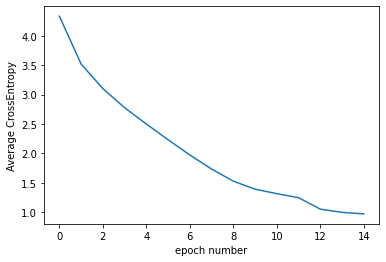

In [21]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [22]:
predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(10, 10 * accuracy / 0.44)))

  0%|          | 0/20 [00:00<?, ?it/s]

Оценка за это задание составит 10 баллов


In [23]:
y_pred, y_true = predict(model, val_dataloader, criterion, device)

print(f"Total accuracy in test: {(np.array(y_pred) == np.array(y_true)).mean() * 100}")

  0%|          | 0/20 [00:00<?, ?it/s]

Total accuracy in test: 44.14


### Отчёт об экспериментах 

That was a pretty tough one.\
\
В первом задании для себя я сперва решил найти как ведет себя точность на валидации, чтобы прописать хороший шедулер с нормальными таймингами, на тот момент батчсайз был 512, шаг 0.02 а коэф шедулера 0.5. После некоторых экспериментов успеха не получилось...\
\
Потом я решил уменьшить батчсайз до 128, шаг до 0.002 и посмотреть как оно будет себя вести, все было получше, вроле бы на 8, но все равно не то. И тут мы уже переходим к хорошей модели\
\
Я взял автошедулер, который смотрит на лосс и в случае его неуменьшения домножает шаг на 0.1, батчсайз взял 256, шаг тот же. Сперва было скептическое отношение, ведь на валидации точность скакала, но тут я понял, что максимально уменьшить лосс - ключ к успеху.